<a href="https://colab.research.google.com/github/VasavSrivastava/MAT421/blob/main/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ODE Initial Value Problem Statement**

A **differential equation** is a mathematical relationship involving a function $f(x)$, its independent variable $x$, and one or more of its derivatives. An **ordinary differential equation (ODE)** is a type of differential equation where the independent variable and the derivatives depend on only one dimension. A general ODE of order $n$ is written as:

$$
F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \dots, \frac{d^n f(x)}{dx^n}\right) = 0
$$

where $F$ is a function that includes any or all of the variables and derivatives, and $n$ is called the **order** of the differential equation.

### **Example: Pendulum ODE**

For example, a pendulum of length $l$ with mass $m$ swinging under gravity $g$ forms an ODE involving the angle $\Theta(t)$ that the pendulum makes with the vertical over time. The equation of motion for the pendulum is:

$$
ml \frac{d^2 \Theta(t)}{dt^2} = -mg \sin(\Theta(t))
$$

This can be derived using Newton’s laws in polar coordinates. If the angle is small (i.e., $\sin(\Theta) \approx \Theta$), the equation simplifies to:

$$
l \frac{d^2 \Theta(t)}{dt^2} = -g \Theta(t)
$$

A **general solution** to this linear ODE is:

$$
\Theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)
$$

If the initial angle and velocity are known, the equation becomes a **particular solution**, such as:

$$
\Theta(t) = \Theta_0 \cos\left(\sqrt{\frac{g}{l}}t\right)
$$

### **PDE vs ODE**

A **partial differential equation (PDE)** involves multiple independent variables and partial derivatives. An example is the **heat equation**:

$$
\frac{\partial u(t,x,y,z)}{\partial t} = \alpha \left(
\frac{\partial^2 u}{\partial x^2} +
\frac{\partial^2 u}{\partial y^2} +
\frac{\partial^2 u}{\partial z^2}
\right)
$$

where $u(t,x,y,z)$ is the temperature at time $t$ and $\alpha$ is a diffusion constant.

### **Initial Value Problem**

An **initial value problem (IVP)** provides known values for the function and its derivatives at a specific point (e.g., $x = 0$). For an ODE of order $n$, the values

$$
f(0),\ f'(0),\ f''(0),\ \dots,\ f^{(n-1)}(0)
$$

are specified. These initial conditions ensure a **unique solution** for the ODE under certain conditions. Solving IVPs is crucial in many fields of science and engineering where time evolution is modeled.


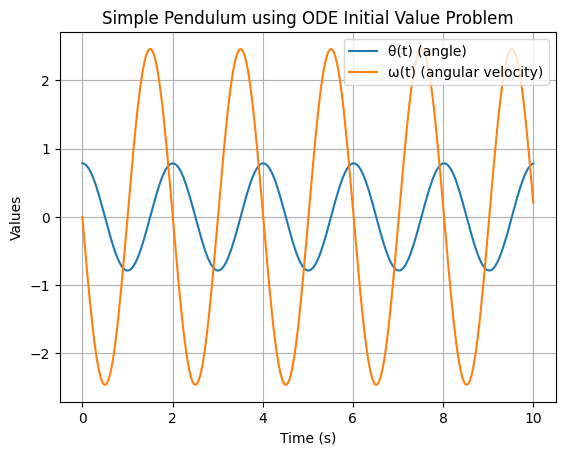

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81    # gravity (m/s^2)
l = 1.0     # length of pendulum (m)

# System of first-order ODEs
# y[0] = theta, y[1] = omega
def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / l) * theta
    return [dtheta_dt, domega_dt]

# Initial conditions: theta(0) = pi/4, omega(0) = 0
y0 = [np.pi / 4, 0]

# Time span
t_span = (0, 10)
t_eval = np.linspace(*t_span, 300)

# Solve the ODE
sol = solve_ivp(pendulum, t_span, y0, t_eval=t_eval)

# Plot results
plt.plot(sol.t, sol.y[0], label='θ(t) (angle)')
plt.plot(sol.t, sol.y[1], label='ω(t) (angular velocity)')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.title('Simple Pendulum using ODE Initial Value Problem')
plt.legend()
plt.grid(True)
plt.show()


# **Reduction of Order**

To solve higher-order ordinary differential equations (ODEs) using numerical methods, we often need to reduce them to a system of **first-order** differential equations. This process is known as **reduction of order**. The idea is to define a new vector function $S(t)$, called the **state** of the system, which collects the function and its derivatives up to order $n - 1$:

$$
S(t) =
\begin{bmatrix}
f(t) \\
f^{(1)}(t) \\
f^{(2)}(t) \\
\vdots \\
f^{(n-1)}(t)
\end{bmatrix}
$$

The derivative of $S(t)$ becomes:

$$
\frac{dS(t)}{dt} =
\begin{bmatrix}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
\vdots \\
F\left(t, f(t), f^{(1)}(t), \dots, f^{(n-1)}(t)\right)
\end{bmatrix}
=
\begin{bmatrix}
S_2(t) \\
S_3(t) \\
S_4(t) \\
\vdots \\
F(t, S_1(t), S_2(t), \dots, S_{n}(t))
\end{bmatrix}
$$

This results in a first-order system of $n$ equations that are **coupled**, meaning they share the same independent variable $t$.

### **Example 1: Simple Pendulum**

Given the second-order pendulum equation (with small angle approximation):

$$
\frac{d^2 \Theta(t)}{dt^2} = -\frac{g}{l} \Theta(t)
$$

Define the state vector as:

$$
S(t) =
\begin{bmatrix}
\Theta(t) \\
\dot{\Theta}(t)
\end{bmatrix}
$$

Then the first-order system is:

$$
\frac{dS(t)}{dt} =
\begin{bmatrix}
S_2(t) \\
-\frac{g}{l} S_1(t)
\end{bmatrix}
$$

In matrix form, this becomes:

$$
\frac{dS(t)}{dt} =
\begin{bmatrix}
0 & 1 \\
-\frac{g}{l} & 0
\end{bmatrix}
S(t)
$$

This is a **linear ODE system**.

### **Example 2: Rabbit and Wolf Population Model**

A basic population dynamics model is given by:

$$
\frac{dr(t)}{dt} = 4r(t) - 2w(t) \\
\frac{dw(t)}{dt} = r(t) + w(t)
$$

Let:

$$
S(t) =
\begin{bmatrix}
r(t) \\
w(t)
\end{bmatrix}
$$

Then the system becomes:

$$
\frac{dS(t)}{dt} =
\begin{bmatrix}
4 & -2 \\
1 & 1
\end{bmatrix}
S(t)
$$

This compact matrix form enables the use of numerical solvers designed for first-order ODEs, even when the original model consists of multiple variables and higher-order derivatives.

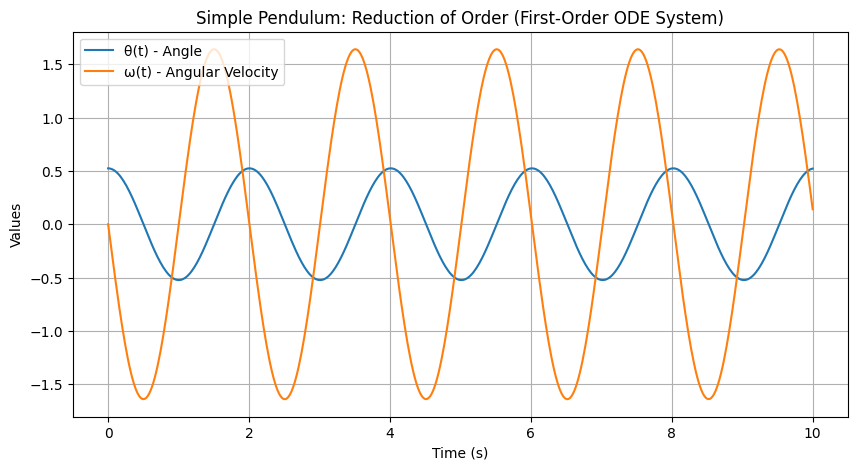

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
g = 9.81   # gravity (m/s^2)
l = 1.0    # length of pendulum (m)

# First-order system of ODEs
# y[0] = theta (θ), y[1] = omega (θ')
def pendulum_system(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / l) * theta
    return [dtheta_dt, domega_dt]

# Initial conditions: theta(0) = pi/6, omega(0) = 0
y0 = [np.pi / 6, 0]

# Time interval and points
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

# Solve the system
sol = solve_ivp(pendulum_system, t_span, y0, t_eval=t_eval)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='θ(t) - Angle')
plt.plot(sol.t, sol.y[1], label="ω(t) - Angular Velocity")
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.title('Simple Pendulum: Reduction of Order (First-Order ODE System)')
plt.legend()
plt.grid(True)
plt.show()

# **The Euler Method**

The **Euler Method** is one of the simplest numerical techniques for solving ordinary differential equations (ODEs), specifically **first-order initial value problems**. Consider a differential equation written as:

$$
\frac{dS(t)}{dt} = F(t, S(t))
$$

where $S(t)$ is the state vector of the system, and $F$ is a function describing its rate of change. The Euler Method approximates the solution over a discretized time grid $t_0, t_1, \dots, t_N$ with step size $h = t_{j+1} - t_j$.

The **Explicit Euler Formula** estimates the next value of $S$ by:

$$
S(t_{j+1}) = S(t_j) + h F(t_j, S(t_j))
$$

This formula uses the slope at the current point $(t_j, S(t_j))$ to estimate the next point by moving a step $h$ forward in time.

## **Steps to Implement the Euler Method**

Given:
- Initial state $S_0 = S(t_0)$
- Time grid: $[t_0, t_f]$ with spacing $h$

Steps:
1. Store $S_0$ in array $S$.
2. Compute $S_1 = S_0 + hF(t_0, S_0)$
3. Store $S_1$
4. Repeat: $S_{j+1} = S_j + hF(t_j, S_j)$ for all $j$ until $t_j = t_f$
5. Final $S$ is the numerical approximation of the solution

## **Implicit and Trapezoidal Euler Variants**

- **Implicit Euler Method**:
  $$
  S(t_{j+1}) = S(t_j) + h F(t_{j+1}, S(t_{j+1}))
  $$

  Requires solving an equation for $S(t_{j+1})$ because the derivative is evaluated at the unknown next point.

- **Trapezoidal Method**:
  $$
  S(t_{j+1}) = S(t_j) + \frac{h}{2} \left[ F(t_j, S(t_j)) + F(t_{j+1}, S(t_{j+1})) \right]
  $$

  Averages the slope at the current and next points. Also implicit and generally more accurate.

## **Matrix Form for Linear Systems**

For linear ODE systems like:

$$
\frac{dS(t)}{dt} = A S(t)
$$

You can write the Explicit Euler update as:

$$
S(t_{j+1}) = \left(I + hA\right) S(t_j)
$$

and Implicit Euler as:

$$
S(t_{j+1}) = \left(I - hA\right)^{-1} S(t_j)
$$

and Trapezoidal as:

$$
S(t_{j+1}) = \left(I - \frac{h}{2}A\right)^{-1} \left(I + \frac{h}{2}A\right) S(t_j)
$$

These updates can be computed efficiently using matrix operations if the system is linear and $A$ is known.


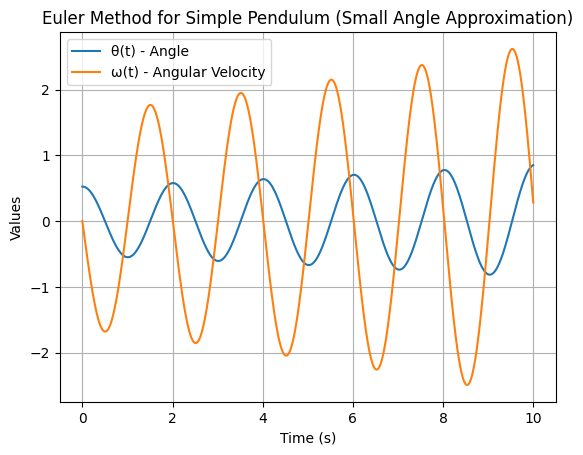

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81
l = 1.0

# Time parameters
t0 = 0
tf = 10
h = 0.01  # step size
N = int((tf - t0) / h)

# Time grid
t = np.linspace(t0, tf, N + 1)

# Initialize solution arrays
theta = np.zeros(N + 1)
omega = np.zeros(N + 1)

# Initial conditions
theta[0] = np.pi / 6  # 30 degrees
omega[0] = 0

# Euler Method loop
for j in range(N):
    dtheta_dt = omega[j]
    domega_dt = -(g / l) * theta[j]

    theta[j + 1] = theta[j] + h * dtheta_dt
    omega[j + 1] = omega[j] + h * domega_dt

# Plot results
plt.plot(t, theta, label='θ(t) - Angle')
plt.plot(t, omega, label='ω(t) - Angular Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.title('Euler Method for Simple Pendulum (Small Angle Approximation)')
plt.legend()
plt.grid(True)
plt.show()